<a href="https://colab.research.google.com/github/esconjaureguy/codon_usage/blob/main/codon_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El archivo contiene datos sobre el uso de codones en diferentes especies, con varias columnas que representan frecuencias de codones (como "UUU", "UUC", etc.) y otra información relacionada (por ejemplo, "Kingdom", "DNAtype", "SpeciesID").

https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset

 Implementar un modelo de clasificación supervisado que pueda aprender patrones distintivos en las frecuencias de codones que permiten predecir con precisión el reino biológico (virus, bacterias, eucariotas) al que pertenece una especie.

In [30]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from collections import Counter
import missingno as msno
import requests
import missingno as msno

In [2]:
#levanto el data set
df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')
df

<ipython-input-2-b924aa866b15>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [3]:
df.shape

(13028, 69)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [5]:
#ver los valores de mi posible variables target
print(df['Kingdom'].unique())
print(df['SpeciesName'].unique())

['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
['Epizootic haematopoietic necrosis virus' 'Bohle iridovirus'
 'Sweet potato leaf curl virus' ...
 'mitochondrion Pongo pygmaeus pygmaeus' 'Homo sapiens'
 'mitochondrion Homo sapiens']


vrl (Virus)
bct (Bacterias)
pln (Plantas)
ani (Animales)
arc (Arqueas)
fun (Hongos)

<Axes: >

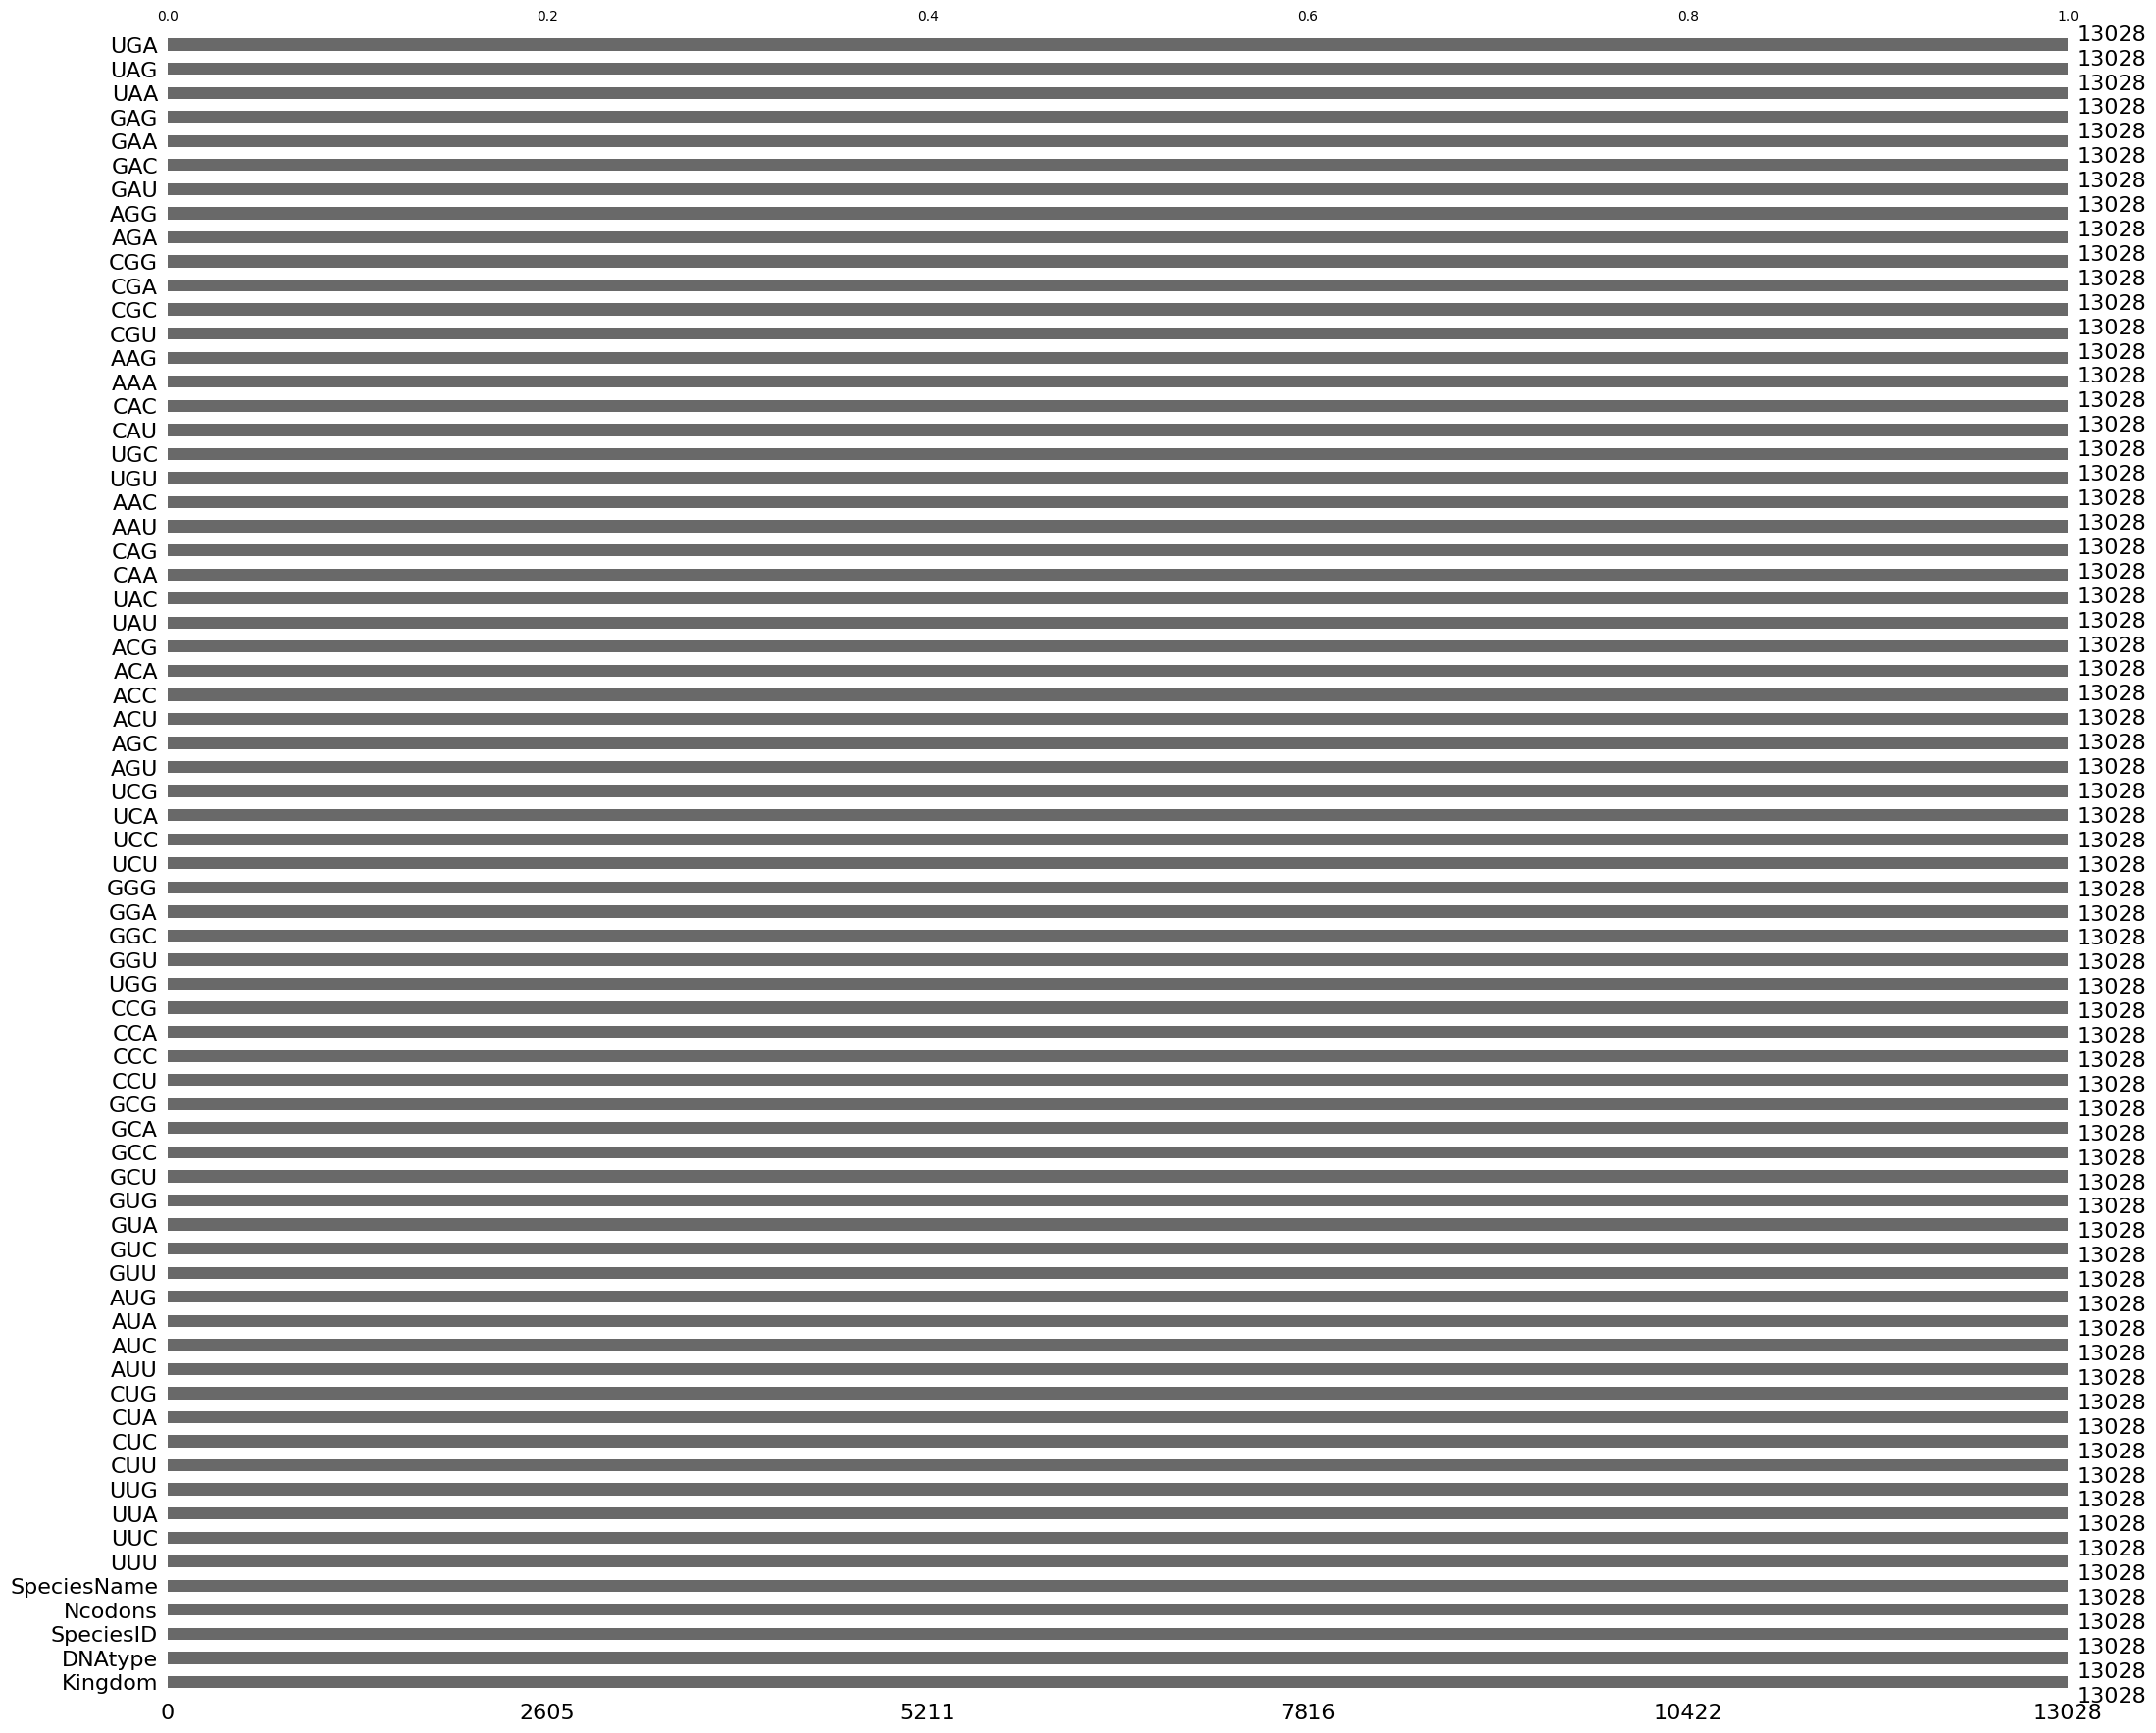

In [6]:
import missingno as msno

# Visualización de los valores nulos en un gráfico de barras
msno.bar(df)

In [7]:
df.isnull().sum()

,0
Kingdom,0
DNAtype,0
SpeciesID,0
Ncodons,0
SpeciesName,0
...,...
GAA,0
GAG,0
UAA,0
UAG,0


No hay valores nulos


#**Data Acquisition**

In [8]:
# Datos que se extraen de la url:https://www.ensembl.org/Multi/Search/Results?q=35s;site=ensembl;page=1;facet_feature_type=Gene
data = """
TRAV35 (Human Gene)
ENSG00000211814 14:22221896-22222475:1
T cell receptor alpha variable 35 [Source:HGNC Symbol;Acc:HGNC:12134].
MAT2A (Human Gene)
ENSG00000168906 2:85539168-85545281:1
Methionine adenosyltransferase 2A [Source:HGNC Symbol;Acc:HGNC:6904].
Washc3 (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000020056 10:88036955-88082020:1
WASH complex subunit 3 [Source:MGI Symbol;Acc:MGI:1914532].
Anks1b (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000058589 10:89709371-90809162:1
Ankyrin repeat and sterile alpha motif domain containing 1B [Source:MGI Symbol;Acc:MGI:1924781].
prss35 (Zebrafish Gene)
ENSDARG00000109353 ALT_CTG16_1_16:20084-21340:1
Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-040704-55].
novel gene (Collared flycatcher Gene)
ENSFALG00000011108 22:3645843-3650821:-1
Novel gene.
novel gene (Baker's yeast Gene)
RDN37-1 XII:451786-457732:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006486].
novel gene (Baker's yeast Gene)
RDN37-2 XII:460923-466869:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006487].
novel gene (Baker's yeast Gene)
snR30 XII:198784-199389:1
H/ACA box small nucleolar RNA (snoRNA); essential gene required for cleavage of 35S primary rRNA transcript to release the precursor to the 18S rRNA [Source:SGD;Acc:S000007497].
"""

# Proceso los datos y organizo la información en una lista
genes_info = []
lines = data.strip().split('\n')

for i in range(0, len(lines), 3):
    nombre_gen = lines[i].strip()
    id_gen = lines[i + 1].strip().split()[0]
    localizacion = lines[i + 1].strip().split()[1]
    descripcion = lines[i + 2].strip()

    genes_info.append({"Nombre": nombre_gen,"ID": id_gen,"Localización": localizacion,"Descripción": descripcion})

# Creo un DataFrame
Df_genes = pd.DataFrame(genes_info)

# creo la lista de los ID
Df_genes['ID'].tolist()

['ENSG00000211814',
 'ENSG00000168906',
 'ENSMUSG00000020056',
 'ENSMUSG00000058589',
 'ENSDARG00000109353',
 'ENSFALG00000011108',
 'RDN37-1',
 'RDN37-2',
 'snR30']

In [9]:
Df_genes = Df_genes.rename(columns={'ID': 'Gene_ID'})

In [10]:
# tomo la informacón de los de la API en la pagina rest.esembl.org


server = "https://rest.ensembl.org"
ext = "/sequence/id/RDN37-1?"

gene_ids = ['ENSG00000211814','ENSG00000168906', 'ENSMUSG00000020056', 'ENSMUSG00000058589', 'ENSDARG00000109353', 'ENSFALG00000011108', 'RDN37-1', 'RDN37-2', 'snR30']

# Crear una lista para almacenar las secuencias obtenidas
secuencias = []

# Iterar sobre cada ID y hacer la solicitud a la API
for gene_id in gene_ids:
    ext = f"/sequence/id/{gene_id}?"
    r = requests.get(server + ext, headers={"Content-Type": "text/plain"})

    if not r.ok:
        r.raise_for_status()

    # Agregar la secuencia a la lista
    secuencias.append(r.text.strip())  # Guardamos la secuencia

# Crear el DataFrame desde cero a partir de los IDs de genes y las secuencias obtenidas
df_genes = pd.DataFrame({
    'Gene_ID': gene_ids,
    'Secuencia': secuencias
})

df_genes


,Gene_ID,Secuencia
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...


In [11]:
# Convertir las secuencias de ADN a ARN (reemplazar T por U)
df_genes['Secuencia_ARN'] = df_genes['Secuencia'].apply(lambda sec: sec.replace('T', 'U'))

df_genes

,Gene_ID,Secuencia,Secuencia_ARN
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...


In [12]:
# Función para dividir la secuencia de ARN en codones (tripletes)
def obtener_codones(secuencia):
    # Dividir la secuencia en tripletes (codones)
    codones = [secuencia[i:i+3] for i in range(0, len(secuencia), 3)]
    return codones

# Aplicar la función a la columna 'Secuencia_ARN' y crear una nueva columna con los codones
df_genes['Codones'] = df_genes['Secuencia_ARN'].apply(obtener_codones)
df_genes['Ncodons'] = df_genes['Codones'].apply(len)

df_genes

,Gene_ID,Secuencia,Secuencia_ARN,Codones,Ncodons
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...,"[AUG, CUC, CUU, GAA, CAU, UUA, UUA, AUA, AUC, ...",194
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...,"[GUU, CGC, UCC, GCG, CCG, CCC, GCC, UGC, UAC, ...",2038
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...,"[GCC, UCU, CUG, AAG, CCA, CCC, AUU, GAA, UGG, ...",15022
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...,"[GUA, GAA, GCU, GCG, CGG, AGA, GAA, GGA, GGA, ...",366598
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...,"[AUG, GGC, CCG, GUA, CCC, UUA, ACG, CUC, CUG, ...",419
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...,"[AUG, UUG, UUU, GGA, GCU, UUG, AAU, CCU, GAC, ...",1660
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...,"[AAC, CAU, AGU, CUC, GUG, CUA, GUU, CGG, UAC, ...",202


In [13]:
# Diccionario para almacenar la frecuencia de codones para cada gene_id
frecuencia_codones_por_gen = {}

# Iterar sobre cada gene_id
for gene_id in gene_ids:

    # Obtener los codones del gen
    codones_gen = df_genes[df_genes['Gene_ID'] == gene_id]['Codones'].values[0]

    # Uso Counter para contar la frecuencia de cada codón
    frecuencia_codones = Counter(codones_gen)

    # Calcular el número total de codones en el gen
    total_codones = sum(frecuencia_codones.values())

    # Normalizar dividiendo la frecuencia de cada codón por el total de codones
    frecuencia_codones_normalizada = {codon: freq / total_codones for codon, freq in frecuencia_codones.items()}

    # Guardar la frecuencia normalizada en el diccionario
    frecuencia_codones_por_gen[gene_id] = frecuencia_codones_normalizada

# Convertir el diccionario de frecuencias normalizadas a un DataFrame
df_frecuencias_codones_normalizadas = pd.DataFrame.from_dict(frecuencia_codones_por_gen, orient='index').fillna(0)

df_frecuencias_codones_normalizadas

,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,UUG,UGG,...,GUC,UCG,ACG,CGG,CGU,AGU,AAU,A,GG,U
ENSG00000211814,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,0.005155,0.036082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000168906,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,0.024043,0.023062,...,0.009814,0.005888,0.005888,0.005397,0.003925,0.016192,0.019627,0.000000,0.000000,0.000000
ENSMUSG00000020056,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,0.020104,0.019105,...,0.010651,0.002796,0.002263,0.002396,0.003395,0.016709,0.021302,0.000000,0.000000,0.000000
ENSMUSG00000058589,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,0.020112,0.017545,...,0.010832,0.002046,0.002264,0.002070,0.002695,0.016751,0.021462,0.000003,0.000000,0.000000
ENSDARG00000109353,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,0.011933,0.016706,...,0.021480,0.002387,0.009547,0.019093,0.016706,0.009547,0.016706,0.000000,0.000000,0.000000
ENSFALG00000011108,0.003614,0.006024,0.001205,0.147590,0.005422,0.001807,0.000000,0.003614,0.006627,0.010843,...,0.001205,0.002410,0.000000,0.000602,0.002410,0.004819,0.007831,0.000000,0.000602,0.000000
RDN37-1,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,0.032274,0.021684,...,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000,0.000000,0.000504
RDN37-2,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,0.032274,0.021684,...,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000,0.000000,0.000504
snR30,0.014851,0.019802,0.019802,0.004950,0.039604,0.009901,0.014851,0.014851,0.034653,0.019802,...,0.009901,0.024752,0.014851,0.014851,0.014851,0.029703,0.000000,0.000000,0.000000,0.000000


In [14]:
# Unir dos DataFrame por la columna ID
df_unido = pd.merge(df_genes, df_frecuencias_codones_normalizadas, left_on='Gene_ID', right_index=True, how='inner')
df_unido.columns

Index(['Gene_ID', 'Secuencia', 'Secuencia_ARN', 'Codones', 'Ncodons', 'AUG',
       'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA', 'AUC', 'UUG', 'UGG', 'CAG',
       'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA', 'UUU', 'ACU', 'CCA', 'UAG',
       'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG', 'AAA', 'UUC', 'GGC', 'AGA',
       'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG', 'GGU', 'GAU', 'GUG', 'UCC',
       'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC', 'GUA', 'CAA', 'GCA', 'CCC',
       'AGC', 'ACC', 'G', 'CGC', 'GCG', 'CCG', 'GCC', 'GUC', 'UCG', 'ACG',
       'CGG', 'CGU', 'AGU', 'AAU', 'A', 'GG', 'U'],
      dtype='object')

In [15]:
#elimino columnas con datos incosistentes y relevantes
df_unido = df_unido.drop(columns=['G','A','U','Secuencia', 'Secuencia_ARN', 'Codones'])
df_unido

,Gene_ID,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,...,CCG,GCC,GUC,UCG,ACG,CGG,CGU,AGU,AAU,GG
0,ENSG00000211814,194,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000168906,2038,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,...,0.007360,0.011776,0.009814,0.005888,0.005888,0.005397,0.003925,0.016192,0.019627,0.000000
2,ENSMUSG00000020056,15022,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,...,0.003129,0.010451,0.010651,0.002796,0.002263,0.002396,0.003395,0.016709,0.021302,0.000000
3,ENSMUSG00000058589,366598,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,...,0.002147,0.009708,0.010832,0.002046,0.002264,0.002070,0.002695,0.016751,0.021462,0.000000
4,ENSDARG00000109353,419,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,...,0.007160,0.007160,0.021480,0.002387,0.009547,0.019093,0.016706,0.009547,0.016706,0.000000
5,ENSFALG00000011108,1660,0.003614,0.006024,0.001205,0.147590,0.005422,0.001807,0.000000,0.003614,...,0.001205,0.003012,0.001205,0.002410,0.000000,0.000602,0.002410,0.004819,0.007831,0.000602
6,RDN37-1,1983,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,...,0.013111,0.012103,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000
7,RDN37-2,1983,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,...,0.013111,0.012103,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000
8,snR30,202,0.014851,0.019802,0.019802,0.004950,0.039604,0.009901,0.014851,0.014851,...,0.000000,0.004950,0.009901,0.024752,0.014851,0.014851,0.014851,0.029703,0.000000,0.000000


In [16]:
# Agregar la columna 'DNAtype' con valor 0 poque los nueve genes obtenidos de la API son genómico
df_unido['DNAtype'] = 0

# Agregar la columna 'Kingdom' con el valor 'ani' yaq ue todos los genes pertenecen al reino animal
df_unido['Kingdom'] = 'ani'
df_unido.columns

Index(['Gene_ID', 'Ncodons', 'AUG', 'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA',
       'AUC', 'UUG', 'UGG', 'CAG', 'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA',
       'UUU', 'ACU', 'CCA', 'UAG', 'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG',
       'AAA', 'UUC', 'GGC', 'AGA', 'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG',
       'GGU', 'GAU', 'GUG', 'UCC', 'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC',
       'GUA', 'CAA', 'GCA', 'CCC', 'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC',
       'GUC', 'UCG', 'ACG', 'CGG', 'CGU', 'AGU', 'AAU', 'GG', 'DNAtype',
       'Kingdom'],
      dtype='object')

In [17]:
DF  =pd.merge(df_unido, Df_genes, on='Gene_ID', how='inner')
DF

,Gene_ID,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,...,CGG,CGU,AGU,AAU,GG,DNAtype,Kingdom,Nombre,Localización,Descripción
0,ENSG00000211814,194,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,ani,TRAV35 (Human Gene),14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...
1,ENSG00000168906,2038,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,...,0.005397,0.003925,0.016192,0.019627,0.000000,0,ani,MAT2A (Human Gene),2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...
2,ENSMUSG00000020056,15022,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,...,0.002396,0.003395,0.016709,0.021302,0.000000,0,ani,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...
3,ENSMUSG00000058589,366598,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,...,0.002070,0.002695,0.016751,0.021462,0.000000,0,ani,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...
4,ENSDARG00000109353,419,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,...,0.019093,0.016706,0.009547,0.016706,0.000000,0,ani,prss35 (Zebrafish Gene),ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...
5,ENSFALG00000011108,1660,0.003614,0.006024,0.001205,0.147590,0.005422,0.001807,0.000000,0.003614,...,0.000602,0.002410,0.004819,0.007831,0.000602,0,ani,novel gene (Collared flycatcher Gene),22:3645843-3650821:-1,Novel gene.
6,RDN37-1,1983,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,...,0.015633,0.009077,0.022189,0.027736,0.000000,0,ani,novel gene (Baker's yeast Gene),XII:451786-457732:-1,35S ribosomal RNA (35S rRNA) transcript; encod...
7,RDN37-2,1983,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,...,0.015633,0.009077,0.022189,0.027736,0.000000,0,ani,novel gene (Baker's yeast Gene),XII:460923-466869:-1,35S ribosomal RNA (35S rRNA) transcript; encod...
8,snR30,202,0.014851,0.019802,0.019802,0.004950,0.039604,0.009901,0.014851,0.014851,...,0.014851,0.014851,0.029703,0.000000,0.000000,0,ani,novel gene (Baker's yeast Gene),XII:198784-199389:1,H/ACA box small nucleolar RNA (snoRNA); essent...


In [18]:
print(DF.columns)
print(df.columns)

Index(['Gene_ID', 'Ncodons', 'AUG', 'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA',
       'AUC', 'UUG', 'UGG', 'CAG', 'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA',
       'UUU', 'ACU', 'CCA', 'UAG', 'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG',
       'AAA', 'UUC', 'GGC', 'AGA', 'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG',
       'GGU', 'GAU', 'GUG', 'UCC', 'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC',
       'GUA', 'CAA', 'GCA', 'CCC', 'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC',
       'GUC', 'UCG', 'ACG', 'CGG', 'CGU', 'AGU', 'AAU', 'GG', 'DNAtype',
       'Kingdom', 'Nombre', 'Localización', 'Descripción'],
      dtype='object')
Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',

# **Data Wrangling**

In [19]:
#junto lo dos data set. El adquirido en kaagle (df) y el obtenido por la API de ENSEMBL (DF)
DF_final = pd.concat([DF, df], axis=0)
DF_final


,Gene_ID,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,...,AGU,AAU,GG,DNAtype,Kingdom,Nombre,Localización,Descripción,SpeciesID,SpeciesName
0,ENSG00000211814,194,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,...,0.000000,0.000000,0.0,0,ani,TRAV35 (Human Gene),14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...,NaN,NaN
1,ENSG00000168906,2038,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,...,0.016192,0.019627,0.0,0,ani,MAT2A (Human Gene),2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...,NaN,NaN
2,ENSMUSG00000020056,15022,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,...,0.016709,0.021302,0.0,0,ani,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...,NaN,NaN
3,ENSMUSG00000058589,366598,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,...,0.016751,0.021462,0.0,0,ani,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...,NaN,NaN
4,ENSDARG00000109353,419,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,...,0.009547,0.016706,0.0,0,ani,prss35 (Zebrafish Gene),ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,NaN,1097,0.020970,0.020970,0.012760,0.020050,0.013670,0.005470,0.010030,0.039200,...,0.017320,0.020050,NaN,0,pri,NaN,NaN,NaN,9601.0,Pongo pygmaeus abelii
13024,NaN,2067,0.012580,0.053220,0.014510,0.018380,0.002900,0.019840,0.034350,0.063860,...,0.003390,0.008220,NaN,1,pri,NaN,NaN,NaN,9601.0,mitochondrion Pongo pygmaeus abelii
13025,NaN,1686,0.012460,0.050420,0.011270,0.027880,0.004740,0.016610,0.026690,0.066430,...,0.001190,0.006520,NaN,1,pri,NaN,NaN,NaN,9602.0,mitochondrion Pongo pygmaeus pygmaeus
13026,NaN,40662582,0.022040,0.019590,0.013190,0.028960,0.010860,0.007670,0.007490,0.020820,...,0.012130,0.016960,NaN,0,pri,NaN,NaN,NaN,9606.0,Homo sapiens


In [26]:
#ver todas lasvariables que tiene el data set
DF_final.dtypes.value_counts()

,0
float64,64
object,8
int64,2


In [29]:
#veo si hay valore nulos.
DF_final.isnull().sum()

,0
Gene_ID,13028
Ncodons,0
AUG,0
CUC,0
CUU,0
...,...
Nombre,13028
Localización,13028
Descripción,13028
SpeciesID,9


<Axes: >

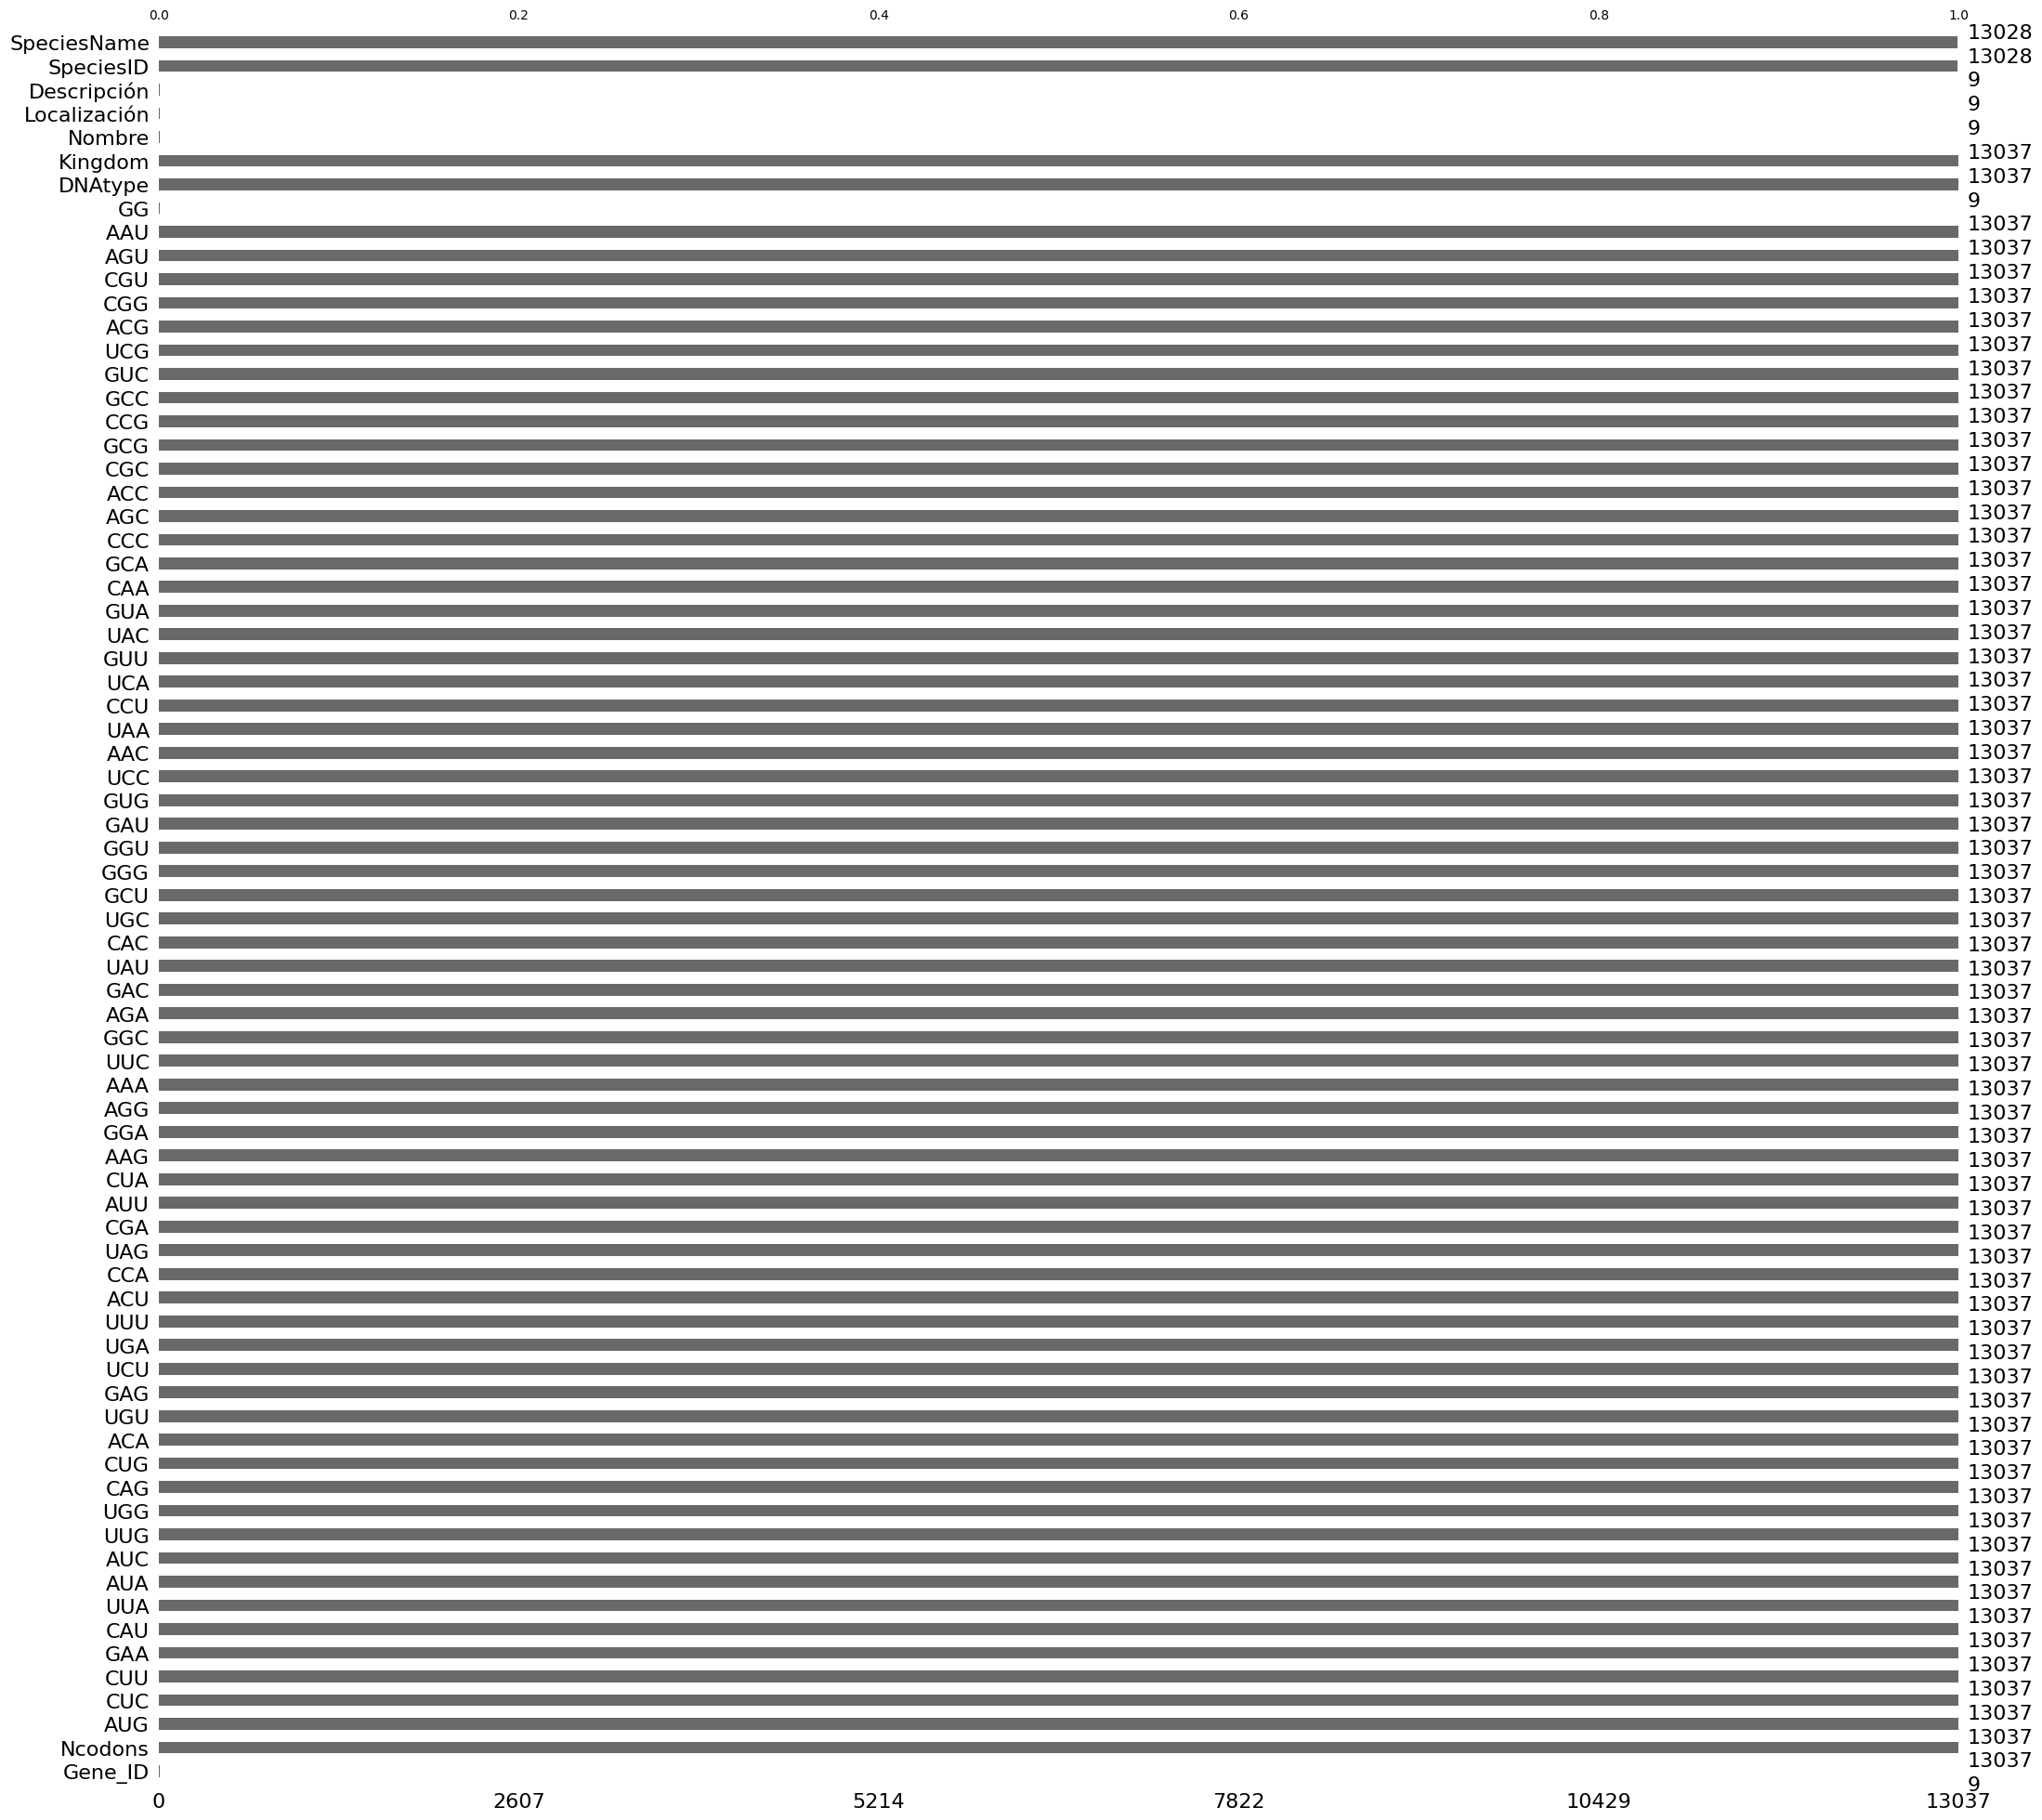

In [32]:
msno.bar(DF_final)

In [39]:
#Elimino las columnaS con valores nulos. Se eliminan porque son reelevantes al objetivo del proyecto
DF_final=DF_final.drop(columns=['Nombre','Localización','Descripción','SpeciesID', 'SpeciesName'])
DF_final.columns

Index(['Gene_ID', 'Ncodons', 'AUG', 'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA',
       'AUC', 'UUG', 'UGG', 'CAG', 'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA',
       'UUU', 'ACU', 'CCA', 'UAG', 'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG',
       'AAA', 'UUC', 'GGC', 'AGA', 'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG',
       'GGU', 'GAU', 'GUG', 'UCC', 'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC',
       'GUA', 'CAA', 'GCA', 'CCC', 'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC',
       'GUC', 'UCG', 'ACG', 'CGG', 'CGU', 'AGU', 'AAU', 'GG', 'DNAtype',
       'Kingdom'],
      dtype='object')

In [45]:
duplicados = DF_final.duplicated()
duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
13023,False
13024,False
13025,False
13026,False


In [50]:
total_duplicados = DF_final.duplicated().sum()
total_duplicados

36

In [53]:
DF_final=DF_final.drop_duplicates()
DF_final.duplicated().sum()

0

In [54]:
DF_final.shape

(13001, 69)